## **Задача 2**

Задача трех тел (Солнце, Юпитер, астероид)

$$m \frac{d^2x}{dt^2} = 2\frac{dy}{dt} + x - \frac{\gamma (x + \mu)}{r_1^3} - \frac{\mu (x - \gamma)}{r_2^3} - f\frac{dx}{dt}$$
$$\frac{d^2y}{dt^2} = -2\frac{dx}{dt} + y - \frac{\gamma y}{r_1^3} - \frac{\mu y}{r_2^3} - f\frac{dy}{dt}$$
$$\mu = 0.00095388$$
$$\gamma = 1 - \mu$$
$$r_1^2 = (x - \mu R1.x)^2 + (y - R1.y)^2$$
$$r_2^2 = ((x - R2.y) - \gamma)^2 + (y - R2.y)^2$$

Масса астеройда пренебрежимо мала по сравнению с массами планет
(координаты астеройда (𝑥, 𝑦)); первые производные появляются
вследствие вращения системы координат и трения, пропорционального
скорости с коэффициентом пропорциональности 𝑓. 


### **Метод Рунге-Кутты-Фельберга**

1. Вычисляются значения:

$$k_1 = f(t_n, y_n)$$
$$k_2 = f(t_n + \frac{1}{4}\tau, y_n + \frac{1}{4}\tau k_1)$$
$$k_3 = f(t_n + \frac{3}{8}\tau, y_n + \frac{3}{32}\tau k_1 + \frac{9}{32}\tau k_2)$$
$$k_4 = f(t_n + \frac{12}{13}\tau, y_n + \frac{1932}{2197}\tau k_1 - \frac{7200}{2197}\tau k_2 + \frac{7296}{2197}\tau k_3)$$
$$k_5 = f(t_n + \tau, y_n + \frac{439}{216}\tau k_1 - 8\tau k_2 + \frac{3680}{513}\tau k_3 - \frac{845}{4104}\tau k_4)$$
$$k_6 = f(t_n + \frac{1}{2}\tau, y_n - \frac{8}{27}\tau k_1 + 2\tau k_2 - \frac{3544}{2565}\tau k_3 + \frac{1859}{4104}\tau k_4 - \frac{11}{40}\tau k_5)$$

2. С помощью метода 4 порядка находится

$$\tilde y_{n+1} = y_n + \tau (\frac{25}{216}k_1 + \frac{1408}{2565}k_3 + \frac{2197}{4104}k_4- \frac{1}{5}k_5)$$

3. С помощью метода 5 порядка определяется

$$y_{n+1} = y_n + \tau (\frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6)$$

4. Определяется оптимальная величина шага

$$\tau_{opt} = \tau (\frac{\epsilon \tau}{2 |y_{n+1} - \tilde y_{n+1}|})^{\frac{1}{4}}$$


5. Находится значение $y_{n+1}(\tau_{opt})$.

Решить задачу трех тел с координатами $R_1 = (0.5 - 0.5\mu; -0.5\sqrt{3})$ и $R_2 = (0.5\sqrt{3}; 0.5 - 0.5\mu)$, начальную скорость считать нулевой. Рассмотреть f = 0; 0.001; 0.1. Изучить влияние выбора $\tau$ на решение системы ОДУ.

**Анимировать решение**

**C учетом некоторых исправлений условия, получаем систему**

$$\frac{dx}{dt} = V_x$$
$$m \frac{dV_x}{dt} = 2 V_y + x + \frac{\gamma (x - \mu R1. x)}{r_1^3} + \frac{\mu (x - \gamma R2. x)}{r_2^3} - f V_x$$
$$\frac{dy}{dt} = V_y$$
$$\frac{dV_y}{dt} = -2 V_x + y + \frac{\gamma (y - R1. y)}{r_1^3} + \frac{\mu (y - R2. y)}{r_2^3} - f V_y$$

$$\mu = 0.00095388$$
$$\gamma = 1 - \mu$$
$$r_1^2 = (x - \mu R1. x)^2 + (y - R1.y)^2$$
$$r_2^2 = (x - \gamma R2. x)^2 + (y - R2.y)^2$$

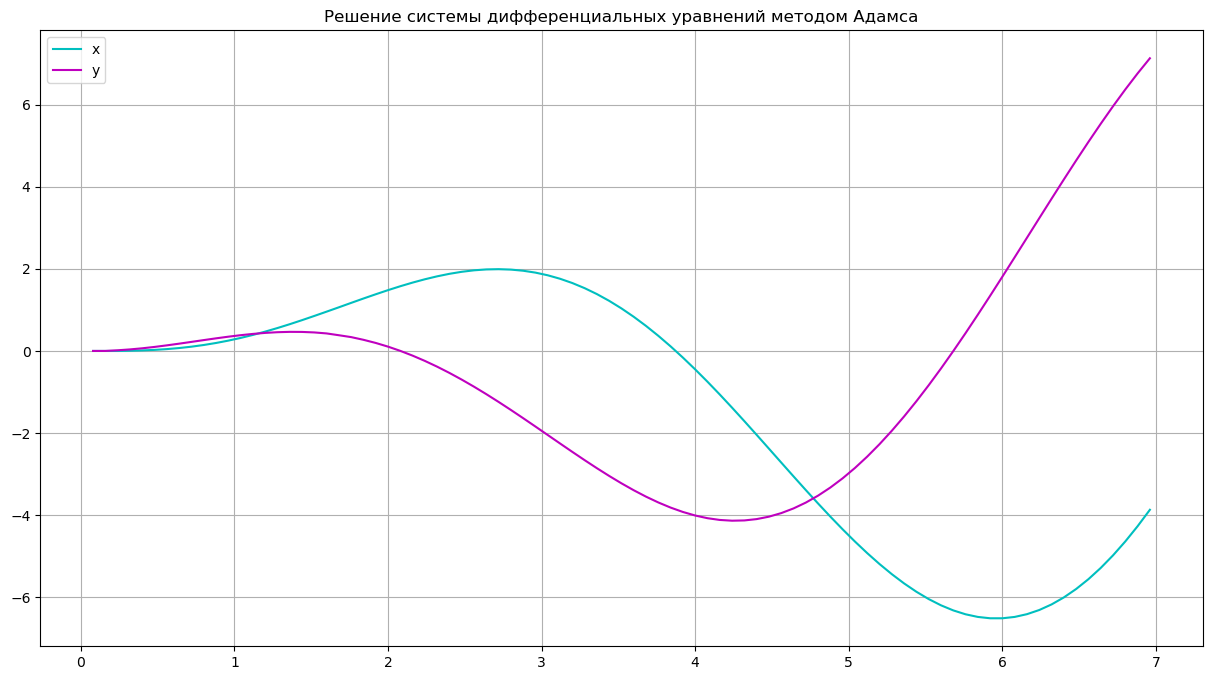

In [286]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
from scipy. integrate import odeint

Mu = 0.00095388
Gamma = 1 - Mu
Epsilon = 1e-5
f = 0.1
R1 = [0.5 - 0.5 * Mu, -0.5 * math.sqrt(3)]
R2 = [0.5 * math.sqrt(3), 0.5 - 0.5 * Mu]
DeltaT = 0.08
Start = 0
Stop = 7


def getDist1(X : float, Y : float):
    # Возвращает расстояние с поправкой r1 до тела 1
    CoordX = X - R1[0] * Mu
    CoordY = Y - R1[1]
    return math.sqrt(CoordX**2 + CoordY**2)

def getDist2(X : float, Y : float):
    # Возвращает расстояние с поправкой r2 до тела 2
    CoordX = X - R2[0] * Gamma
    CoordY = Y - R2[1]
    return math.sqrt(CoordX**2 + CoordY**2)
    

def getDerivative(U : list) -> list:
    # Возвращает производную искомых функций в виде столбца 
    # (/*производная времени */ 1, x', Vx', y', Vy') из задания
    t, X, Vx, Y, Vy = U
    
    DerrVx = 2 * Vy + X + Gamma * (X - Mu * R1[0]) / getDist1(X, Y)**3 + Mu * (X - Gamma * R2[0]) / getDist2(X, Y)**3 - f * Vx
    DerrVy = -2 * Vx + Y + Gamma * (Y - R1[1])  / getDist1(X, Y)**3 + Mu * (Y - R2[1]) / getDist2(X, Y)**3 - f * Vy
    Deriv = np.array([1, Vx, DerrVx, Vy, DerrVy])
    return Deriv

def getStartCoord() -> list:
    # Начальное значение задачи Коши в формате (t0, x0, Vx0, y0, Vy0)
    return np.array([0, 0, 0, 0, 0])

      
def calculateAdamsTrajectory(StartCoord : list, Start: float, Stop: float, DeltaT: float) -> list:
    # Рассчитывает траекторию методом Адамса
    Trajectory = []
    K0 = StartCoord
    K1 = StartCoord
    K2 = StartCoord
    NumPoints = int((Stop - Start) / DeltaT)
    for Point in range(NumPoints):
        f2 = getDerivative(K2)
        f1 = getDerivative(K1)
        f0 = getDerivative(K0)
        K3 = K2 + DeltaT * (23.0/12 * f2 - 16.0/12 * f1 + 5.0/12 * f0)
        Trajectory.append(K2)
        K0 = K1
        K1 = K2
        K2 = K3
    return Trajectory

def showTrajectory(Args : list, Vals : list, Title : str):
    # Изображает траекторию X(t), Y(t) на графике
    plt.figure(figsize = (15, 8))
    plt.title(Title)

    X = []
    Y = []
    for Val in Vals:
        X.append(Val[1])
        Y.append(Val[3])
    if (len(Args) > len(X)):
        Args = np.delete(Args, 0, 0)
    plt.plot(Args, X, 'c', label = "x")
    plt.plot(Args, Y, 'm', label = "у")
    
    plt.legend()
    plt.grid()
    plt.show()  
    
def main():
    Args = np.arange(Start, Stop, DeltaT)
    AdamsVals = calculateAdamsTrajectory(getStartCoord(), Start, Stop, DeltaT)
    showTrajectory(Args, AdamsVals, "Решение системы дифференциальных уравнений методом Адамса")
    

if __name__ == '__main__':
    main()

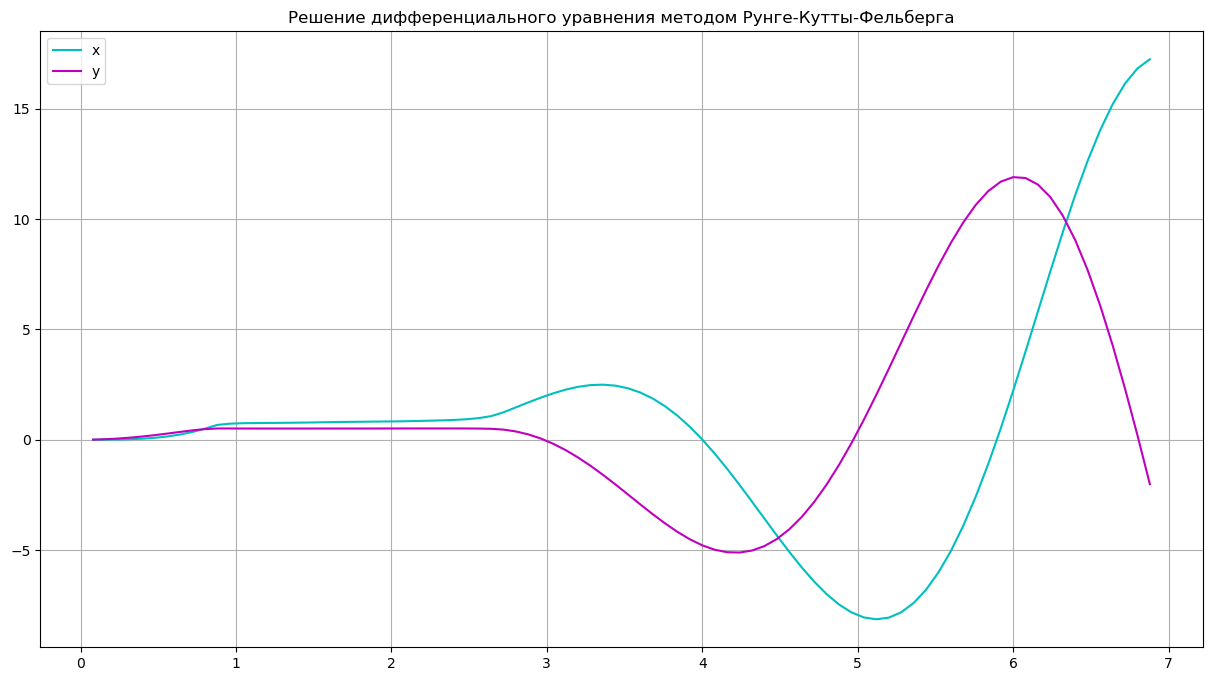

In [287]:
def getNorm(U : list):
    # Считает норму, не учитывая первой временнОй координаты
    t, X, Vx, Y, Vy = U
    return math.sqrt(X**2 + Vx**2 + Y**2 + Vy**2)

def calculateRungeKuttaTrajectory(StartCoord : list, Start: float, Stop: float, DeltaT: float) -> list:
    # Рассчитывает траекторию методом Рунге-Кутты-Фельберга
    Trajectory = []
    U0 = StartCoord
    NumPoints = int((Stop - Start) / DeltaT - 1)
    for Point in range(NumPoints):
        K1 = getDerivative(U0)
        K2 = getDerivative(U0 + DeltaT / 4 * K1)
        Point3 = U0 + 3 * DeltaT / 32 * K1 + 9 * DeltaT / 32 * K2
        Point3[0] = U0[0] + 3 * DeltaT / 8
        K3 = getDerivative(Point3)
        Point4 = U0 + 1932 * DeltaT / 2197 * K1 - 7200 * DeltaT / 2197 * K2 + 7296 * DeltaT / 2197 * K3
        Point4[0] = U0[0] + 12 * DeltaT / 13
        K4 = getDerivative(Point4)
        Point5 = U0 + 439 * DeltaT / 216 * K1 - 8 * DeltaT * K2 + 3680 * DeltaT / 513 * K3 - 845 * DeltaT / 4104 * K4
        Point5[0] = U0[0] + DeltaT
        K5 = getDerivative(Point5)
        Point6 = U0 - 8 * DeltaT / 27 * K1 + 2 * DeltaT * K2 - 3544 * DeltaT / 2565 * K3 + 1859 * DeltaT / 4104 * K4 - 11 * DeltaT / 40 * K5
        Point6[0] = U0[0] + DeltaT / 2
        K6 = getDerivative(Point6)
        
        U1 = U0 + DeltaT * (25 * K1 / 216 + 1408 * K3 / 2565 + 2197 * K4 / 4104 - K5 / 5)
        U2 = U0 + DeltaT * (16 * K1 / 135 + 6656 * K3 / 12825 + 28561 * K4 / 56430 - 9 * K5 / 50 + 2 * K6 / 55)
        
        DeltaOpt = DeltaT * (Epsilon * DeltaT / (2 * getNorm(U1 - U2)))**(1.0 / 4)
        
        U1 = U0 + DeltaOpt * (25 * K1 / 216 + 1408 * K3 / 2565 + 2197 * K4 / 4104 - K5 / 5)
        U0 = U1
        Trajectory.append(U0)
    return Trajectory
      
def main():
    Args = np.arange(Start, Stop - DeltaT, DeltaT)
    RungeKuttaVals = calculateRungeKuttaTrajectory(getStartCoord(), Start, Stop, DeltaT)
    showTrajectory(Args, RungeKuttaVals, "Решение дифференциального уравнения методом Рунге-Кутты-Фельберга")

    
if __name__ == '__main__':
    main()

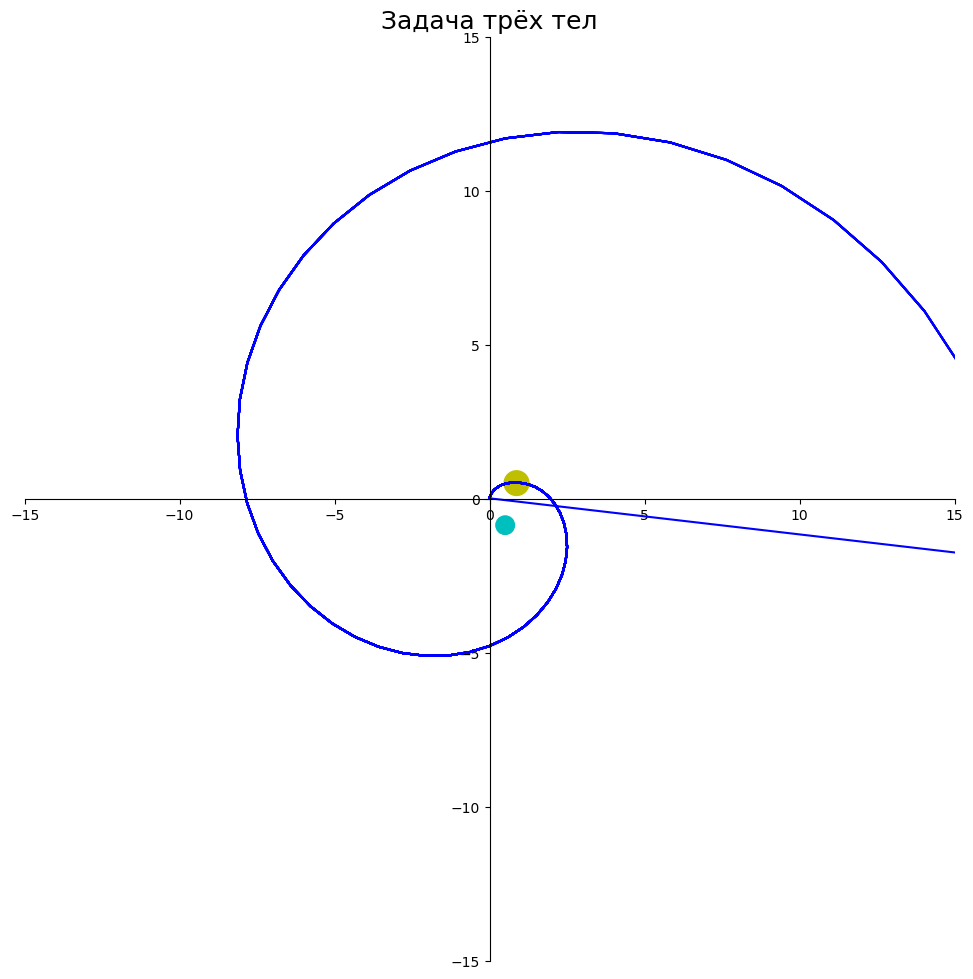

In [288]:
import matplotlib.animation as animation
import pandas as pd
import os

X_coord = []
Y_coord = []

def animate(i):
    X_coord.append(df['x'].iloc[i])
    Y_coord.append(df['y'].iloc[i])
    ax.plot(X_coord,Y_coord, 'b')

df = pd.DataFrame()
Args = np.arange(Start, Stop, DeltaT)
AdamsVals = calculateRungeKuttaTrajectory(getStartCoord(), Start, Stop, DeltaT)
X = []
Y = []
for Val in AdamsVals:
    X.append(Val[1])
    Y.append(Val[3])
df['x'] = X
df['y'] = Y
df.head()
path_script = os.getcwd()
df.to_csv(path_script + '/dataset.csv', index = False)

df = pd.DataFrame()
path_script = os.getcwd()
df = pd.read_csv(path_script + '/dataset.csv')

fig,ax = plt.subplots(figsize = (12,12))

Lim = 15
ax.set_xlim(-Lim, Lim)
ax.set_ylim(-Lim, Lim)

ax.set_title('Задача трёх тел', fontsize = 18)

Yupiter = plt.Circle((R1[0], R1[1]), 0.3, color='c', fill=True)
Sun = plt.Circle((R2[0], R2[1]), 0.4, color='y', fill=True)
    
ax = plt.gca()
    
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.add_patch(Yupiter)
ax.add_patch(Sun)

anim = animation.FuncAnimation(fig, animate,  frames = len(df.index), interval = len(df.index))
anim.save(os.getcwd() + '/ThreeCosmicBodies.gif', fps = 10, writer = 'pillow')